Introduction: Our airline company is going to acquire 5 new airplanes, each for a round trip route. We're provided with 3 original datasets about airports, flights, and tickets information. The following analysis is divided into 6 parts:

1. Data Quality Check:
Include data cleaning, exploratory analysis, and outlier detection.

2. Data Munging

3. Calculations & Visualizations:
Look into important numeric variables of 3 metrics: Profitability, Traffic, and Punctuality.

4. Make recommendations on the final chosen 5 round trip routes based on priorities and assumptions

5. Important KPIs to track in the future

6. Next steps based on customer groups and acquisition risks

<span style='color:Blue'>All the newly created metadata fields are marked with blue fonts, and also in the Excel 'New_Metadata.'</span>

## 1. Data Quality Check

In [556]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [557]:
#read 3 csv files
Air_Codes = pd.read_csv("data/Airport_Codes.csv")
Flights = pd.read_csv("data/Flights.csv")
Tickets = pd.read_csv("data/Tickets.csv")

/var/folders/9t/b29bj4zj2ld3w4lv5s2s_v9m0000gn/T/ipykernel_701/1996320189.py:3: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  Flights = pd.read_csv("data/Flights.csv")


**1.1 Airport_Codes dataset**

In [558]:
#show top 5 lines of data
Air_Codes.head()


,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


**Remove irrelevant data:**

In [559]:
#check airport types
Air_Codes['TYPE'].unique()

#only include medium and large airports
Air_Codes=Air_Codes[Air_Codes['TYPE'].isin(['medium_airport','large_airport'])]

#only include US airports
Air_Codes=Air_Codes[Air_Codes['ISO_COUNTRY'].isin(['US'])]


**Standardize data format:**

In [560]:
# a function to check whether 'IATA CODE' consists of characters or not

def is_alphabet(code):
    codelist = code.str
    return codelist.isalpha()!=False

#check
is_alphabet(Air_Codes['IATA_CODE']).unique()


array([ True])

In [561]:
# a function to standardize the format: the first character is uppercase and remaining is lowercase

def capitalize(words):
    return words.title()

# standardize 'NAME'
Air_Codes['NAME'] = capitalize(Air_Codes['NAME'].str)


**Check data types:**

In [562]:
Air_Codes.dtypes

TYPE             object
NAME             object
ELEVATION_FT    float64
CONTINENT        object
ISO_COUNTRY      object
MUNICIPALITY     object
IATA_CODE        object
COORDINATES      object
dtype: object

In [563]:
# a function to check whether there is any unexpected special symbol

def if_contain_symbol(keyword):
    symbols = "~!@#$%^&*()_+-*/<>,.[]\/"
    for symbol in symbols:
        if symbol in keyword:
            return symbol
    else:
        return False
print('Found special symbol:')
if_contain_symbol(Air_Codes.to_string())


Found special symbol:


'#'

In [564]:
# check values with '#'
for x in Air_Codes.NAME.astype(str):
    if '#' in x:
        print(x)     

print("It's normal to have '#' in airport names.")

Yuma Auxiliary Aaf #2
It's normal to have '#' in airport names.


**Deal with missing values:**

In [565]:
#check the number of missing values for each column
Air_Codes.isnull().sum()


TYPE              0
NAME              0
ELEVATION_FT      3
CONTINENT       858
ISO_COUNTRY       0
MUNICIPALITY      3
IATA_CODE        37
COORDINATES       0
dtype: int64

In [566]:
# define a function about the sparsity per variable retained
def Sparsity_per_variable(dataframe):
    return ((len(dataframe.index) - dataframe.count()) / len(dataframe.index))

print('Sparsity per variable:')
print(Sparsity_per_variable(Air_Codes))


Sparsity per variable:
TYPE            0.000000
NAME            0.000000
ELEVATION_FT    0.003497
CONTINENT       1.000000
ISO_COUNTRY     0.000000
MUNICIPALITY    0.003497
IATA_CODE       0.043124
COORDINATES     0.000000
dtype: float64


In [567]:
#drop entire column of 'CONTINENT' due to 100% sparsity
Air_Codes.drop('CONTINENT', axis = 1, inplace = True)

#fill missing values of 'MUNICIPALITY' with 'BLANK' due to low importance & low sparsity
Air_Codes['MUNICIPALITY'].fillna('BLANK', inplace = True)

#fill missing values of 'ELEVATION_FT' with median
Air_Codes['ELEVATION_FT'] = Air_Codes['ELEVATION_FT'].fillna(Air_Codes['ELEVATION_FT'].median())


In [568]:
# show 37 missing values of 'IATA_CODE' 
null_IATA = Air_Codes[pd.isnull(Air_Codes['IATA_CODE'])]
null_IATA


,TYPE,NAME,ELEVATION_FT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
25963,medium_airport,South Alabama Regional At Bill Benton Field Ai...,310.0,US,Andalusia/Opp,NaN,"-86.393799, 31.3088"
27145,medium_airport,Shelby County Airport,586.0,US,Alabaster,NaN,"-86.78279877, 33.17699814"
27517,medium_airport,Wheeler Sack Army Air Field,688.0,US,Fort Drum,NaN,"-75.71949768, 44.05559921"
27648,medium_airport,Hurlburt Field,38.0,US,Mary Esther,NaN,"-86.68930053710938, 30.427799224853516"
27685,medium_airport,San Marcos Regional Airport,597.0,US,San Marcos,NaN,"-97.862999, 29.8927"
27822,medium_airport,Julian Carroll Airport,1381.0,US,Jackson,NaN,"-83.31729888916016, 37.59389877319336"
27979,medium_airport,Monticello Municipal Ellis Field,270.0,US,Monticello,NaN,"-91.75099945, 33.6385994"
28221,medium_airport,Mc Minnville Municipal Airport,163.0,US,Mc Minnville,NaN,"-123.1360016, 45.19440079"
28345,medium_airport,Beaufort Mcas - Merritt Field,37.0,US,Beaufort,NaN,"-80.723197937, 32.4774017334"
28348,medium_airport,New River Mcas /H/ /Mccutcheon Fld/ Airport,26.0,US,Jacksonville,NaN,"-77.43969727, 34.70840073"


Among those airports above, I believe that row 49569 (Atl airport) should be corrected as 'Hartsfield Jackson Atlanta International Airport', with an IATA code of 'ATL'.

I also assume that other airports do not have associated IATA codes or couldn't find IATA codes in other two files. 
 

In [569]:
# replace the name of 'Atl' with 'Hartsfield Jackson Atlanta International Airport'
null_IATA['NAME'].loc[null_IATA['NAME']=='Atl'] = 'Hartsfield Jackson Atlanta International Airport'

# only fill the missing IATA code of'Hartsfield Jackson Atlanta International Airport' with 'ATL'
null_IATA['IATA_CODE'] = null_IATA['IATA_CODE'].loc[null_IATA['NAME']=='Hartsfield Jackson Atlanta International Airport'].fillna('ATL')

# pass to Air_Codes dataframe
Air_Codes[pd.isnull(Air_Codes['IATA_CODE'])] = null_IATA

# drop the remainig IATA code missing values
Air_Codes.dropna(subset = ['IATA_CODE'],inplace=True)


/var/folders/9t/b29bj4zj2ld3w4lv5s2s_v9m0000gn/T/ipykernel_701/249386369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_IATA['NAME'].loc[null_IATA['NAME']=='Atl'] = 'Hartsfield Jackson Atlanta International Airport'
/var/folders/9t/b29bj4zj2ld3w4lv5s2s_v9m0000gn/T/ipykernel_701/249386369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_IATA['IATA_CODE'] = null_IATA['IATA_CODE'].loc[null_IATA['NAME']=='Hartsfield Jackson Atlanta International Airport'].fillna('ATL')


**'Air_Codes' dataframe has no missing values now.**

In [570]:
#check missing values again
Air_Codes.isnull().sum()

TYPE            0
NAME            0
ELEVATION_FT    0
ISO_COUNTRY     0
MUNICIPALITY    0
IATA_CODE       0
COORDINATES     0
dtype: int64

**1.2 Flights dataset**

In [571]:
#check top 5 rows
Flights.head()


,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [572]:
#check last 5 rows
Flights.tail()


,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344
1915885,3/27/19,AA,N945AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,5.0,0.0,117,****,0.350192


**Exclude irrelevant data (cancelled airflights):**

In [573]:
Flights = Flights[Flights['CANCELLED'].isin([0])]


**Noticing the inconsistency of 'FL_DATE' format:**

In [574]:
# create a function that defines a consistent date format
def time_format(timestr):  
    return pd.to_datetime(timestr).dt.strftime('%Y-%m-%d')

# formatting date
Flights.FL_DATE = time_format(Flights.FL_DATE)


**Check data types:**
Noticing the values of 'OP_CARRIER_FL_NUM ','AIR_TIME', and 'DISTANCE' should be numeric.

In [575]:
Flights.dtypes


FL_DATE               object
OP_CARRIER            object
TAIL_NUM              object
OP_CARRIER_FL_NUM     object
ORIGIN_AIRPORT_ID      int64
ORIGIN                object
ORIGIN_CITY_NAME      object
DEST_AIRPORT_ID        int64
DESTINATION           object
DEST_CITY_NAME        object
DEP_DELAY            float64
ARR_DELAY            float64
CANCELLED            float64
AIR_TIME              object
DISTANCE              object
OCCUPANCY_RATE       float64
dtype: object

**Deal with data type issues:**

In [576]:
# show wrong'OP_CARRIER_FL_NUM' values that are not numeric
WRONG_FL_NUM = Flights.loc[Flights.OP_CARRIER_FL_NUM.str.isnumeric() == False]
WRONG_FL_NUM.OP_CARRIER_FL_NUM.unique()


array(['ACA', 'DDD', 'YUD', 'ARD'], dtype=object)

In [577]:
# delete non-numeric 'OP_CARRIER_FL_NUM' values
Flights = Flights[Flights.OP_CARRIER_FL_NUM.isin(['ACA', 'DDD', 'YUD', 'ARD']) == False]


In [578]:
# show wrong 'AIR_TIME' values that are not numeric
WRONG_AIR_TIME = Flights.loc[Flights.AIR_TIME.str.isnumeric() == False]

#show unique values
WRONG_AIR_TIME.AIR_TIME.unique()


array(['39.0', '36.0', '31.0', '33.0', '32.0', '30.0', '29.0', '41.0',
       '34.0', '27.0', '44.0', '122.0', '117.0', '111.0', '121.0',
       '137.0', '133.0', '131.0', '184.0', '142.0', '123.0', '116.0',
       '162.0', '128.0', '134.0', '125.0', '130.0', '119.0', '114.0',
       '113.0', '136.0', '135.0', '149.0', '146.0', '139.0', '140.0',
       '159.0', '143.0', '127.0', '152.0', '124.0', '63.0', '55.0',
       '52.0', '50.0', '58.0', '104.0', '98.0', '103.0', '89.0', '76.0',
       '80.0', '92.0', '88.0', '95.0', '78.0', '96.0', '93.0', '90.0',
       '83.0', '94.0', '100.0', '87.0', '84.0', '79.0', '43.0', '42.0',
       '45.0', '48.0', '47.0', '51.0', '49.0', '67.0', '69.0', '64.0',
       '57.0', '61.0', '65.0', '66.0', '62.0', '68.0', '56.0', '59.0',
       '70.0', '81.0', '72.0', '74.0', '60.0', '145.0', '141.0', '144.0',
       '151.0', '150.0', '154.0', '148.0', '153.0', '168.0', '165.0',
       '171.0', '190.0', '192.0', '183.0', '180.0', '167.0', '178.0',
       '186.

In [579]:
# delete 'Two' and '-121' because they're probably outliers
Flights.drop(index = Flights[(Flights.AIR_TIME == 'Two') | (Flights.AIR_TIME == '-121')].index, inplace=True)

# replace 'NAN' and '$$$' with NaN
Flights.AIR_TIME = Flights.AIR_TIME.replace(['NAN', '$$$'],[np.nan, np.nan])


In [580]:
# show wrong 'DISTANCE' values that are not numeric
WRONG_DISTANCE = Flights.loc[Flights.DISTANCE.str.isnumeric() == False]
WRONG_DISTANCE.DISTANCE.unique()


array(['190.0', '147.0', '963.0', '864.0', '286.0', '561.0', '280.0',
       '403.0', '1089.0', '118.0', '323.0', '812.0', '164.0', '296.0',
       '431.0', '427.0', '773.0', '607.0', '293.0', '292.0', '708.0',
       '229.0', '137.0', '140.0', '859.0', '589.0', '419.0', '328.0',
       '109.0', '999.0', '461.0', '158.0', '483.0', '181.0', '585.0',
       '335.0', '489.0', '304.0', '500.0', '630.0', '491.0', '528.0',
       '765.0', '295.0', '414.0', '161.0', '240.0', '1272.0', '642.0',
       '404.0', '315.0', '764.0', '264.0', '577.0', '83.0', '723.0',
       '925.0', '334.0', '1874.0', '679.0', '612.0', '1846.0', '2227.0',
       '1744.0', '337.0', '550.0', '1250.0', '719.0', '966.0', '956.0',
       '1969.0', '997.0', '2454.0', '1023.0', '867.0', '1754.0', '1514.0',
       '316.0', '621.0', '643.0', '602.0', '776.0', '1123.0', '861.0',
       '1190.0', '1011.0', '1024.0', '763.0', '236.0', '2288.0', '2585.0',
       '2133.0', '1911.0', '455.0', '801.0', '2565.0', '1605.0', '2139.0'

In [581]:
# delete 'Hundred','Twenty', '-1947', and '-198' due to vague information or seem to be an outlier
Flights.drop(index = Flights[(Flights.DISTANCE == 'Hundred') | (Flights.DISTANCE == 'Twenty') | (Flights.DISTANCE == -1947) | (Flights.DISTANCE == -198)].index, inplace=True)

# replace 'NAN' and '****' with NaN
Flights.DISTANCE = Flights.DISTANCE.replace(['NAN', '****'],[np.nan, np.nan])



**Deal with missing values:**

In [582]:
# call the Sparsity_per_variable function again

print('Sparsity per variable:')
print(Sparsity_per_variable(Flights))

Sparsity per variable:
FL_DATE              0.000000
OP_CARRIER           0.000000
TAIL_NUM             0.000000
OP_CARRIER_FL_NUM    0.000000
ORIGIN_AIRPORT_ID    0.000000
ORIGIN               0.000000
ORIGIN_CITY_NAME     0.000000
DEST_AIRPORT_ID      0.000000
DESTINATION          0.000000
DEST_CITY_NAME       0.000000
DEP_DELAY            0.000000
ARR_DELAY            0.002348
CANCELLED            0.000000
AIR_TIME             0.003673
DISTANCE             0.001427
OCCUPANCY_RATE       0.000166
dtype: float64


Using RandomForestRegressor to fill missing values of 'ARR_DELAY' because delay time is very crucial to the following analysis of costs. And random forest regression is one of the most accurate ways to fill missing values.

In [583]:
from sklearn.ensemble import RandomForestRegressor

# make a copy of 'Flights' dataframe
Flights_copy = Flights.copy()


In [584]:
# split datasets into train set and prediction set; train dataset contains non-missing values
traindata = Flights_copy[pd.isnull(Flights_copy['ARR_DELAY'] ) == False]
predictdata = Flights_copy[pd.isnull(Flights_copy['ARR_DELAY'])]
    
# only include numeric variables into modeling
num_variables = ['DEP_DELAY','ARR_DELAY','AIR_TIME','DISTANCE','OCCUPANCY_RATE']
traindata=traindata[num_variables]
predictdata=predictdata[num_variables]
   

In [585]:
# use remaining variables as an array
independent_variables = ['DEP_DELAY','AIR_TIME','DISTANCE','OCCUPANCY_RATE']

#fill the missing values above; fill with 0 due to minimum effects on datasets
predictdata[independent_variables] = predictdata[independent_variables].fillna(0)
traindata[independent_variables] = traindata[independent_variables].fillna(0)


In [586]:
rfModel_ARR_DELAY = RandomForestRegressor()

# fit input and target, build a forest of trees from the training set
rfModel_ARR_DELAY.fit(traindata[independent_variables], traindata.ARR_DELAY)

# predict 'ARR_DELAY' values
generated_ARR_DELAY = rfModel_ARR_DELAY.predict(X = predictdata[independent_variables])


In [588]:
generated_ARR_DELAY

array([-12.58333333,  -0.27      ,  -7.94      , ...,  30.31      ,
        30.31      ,  30.31      ])

In [589]:
# transfer predicted outcomes into integers
predictdata.ARR_DELAY=generated_ARR_DELAY.astype(int)

#append to the initial dataframe
Flights_copy = traindata.append(predictdata)

#pass to 'Flights'
Flights.ARR_DELAY = Flights_copy.ARR_DELAY.astype(int)


/var/folders/9t/b29bj4zj2ld3w4lv5s2s_v9m0000gn/T/ipykernel_701/1849359704.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Flights_copy = testdata.append(traindata)


In [590]:
# replace missing values of 'AIR_TIME','DISTANCE', and 'OCCUPANCY_RATE' with median due to relative low importance to analysis

Flights.AIR_TIME = Flights.AIR_TIME.fillna(Flights.AIR_TIME.median())

Flights.DISTANCE = Flights.DISTANCE.fillna(Flights.DISTANCE.median())

Flights.OCCUPANCY_RATE = round(Flights.OCCUPANCY_RATE.fillna(Flights.OCCUPANCY_RATE.median()), 2)


In [591]:
# convert those floating numbers to integers:

Flights.AIR_TIME = [int(float(x)) for x in Flights.AIR_TIME]

Flights.DISTANCE = [int(float(x)) for x in Flights.DISTANCE]

Flights.DEP_DELAY = [int(float(x)) for x in Flights.DEP_DELAY]

**Check datatypes again: Correct int64 types for 'AIR_TIME' and 'DISTANCE'**

In [592]:
Flights.DEP_DELAY = [int(float(x)) for x in Flights.DEP_DELAY]
Flights.dtypes


FL_DATE               object
OP_CARRIER            object
TAIL_NUM              object
OP_CARRIER_FL_NUM     object
ORIGIN_AIRPORT_ID      int64
ORIGIN                object
ORIGIN_CITY_NAME      object
DEST_AIRPORT_ID        int64
DESTINATION           object
DEST_CITY_NAME        object
DEP_DELAY              int64
ARR_DELAY              int64
CANCELLED            float64
AIR_TIME               int64
DISTANCE               int64
OCCUPANCY_RATE       float64
dtype: object

**Check missing values again: 'Flights' dataset has no missing values now.**

In [593]:
Flights.isnull().sum()

FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             0
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64

<span style='color:Blue'>Creat a metadata field with a name of 'PASSENGER_NUM', which describes the number of passengers on each flight based on the fact that each plane can accommodate up to 200 passengers.</span>

In [594]:
Flights['PASSENGER_NUM'] = (Flights['OCCUPANCY_RATE'] * 200).astype(int)


<span style='color:Blue'>Creat Flights Metadata with a field name of 'MEAN_DELAY', which describes the mean of departure delay and arrival delay for each flight.</span>

In [595]:
Flights['MEAN_DELAY'] = Flights[['DEP_DELAY','ARR_DELAY']].mean(axis=1)


**Deal with outliers:**

Detect outliers in 'MEAN_DELAY', using a threshold of 2.5 for ZSCORE and a upper limit of 30 minutes: 

In [596]:
df = Flights.MEAN_DELAY
threshold = 2.5 
mean = np.mean(df)
std = np.std(df)
outlier = []

for i in df.tolist(): 
    zscore = (i-mean)/std 
    if zscore > threshold: 
        outlier.append(i)
            
print('Outlier in "MEAN_DELAY"',outlier)

Outlier in "MEAN_DELAY" [140.5, 163.5, 230.5, 213.0, 168.5, 267.0, 152.5, 271.0, 226.0, 138.5, 319.5, 150.0, 199.0, 178.0, 228.0, 145.0, 259.5, 174.0, 188.0, 164.0, 185.0, 184.0, 155.0, 253.0, 177.0, 151.0, 137.0, 228.0, 182.5, 149.0, 261.5, 159.5, 230.5, 144.5, 141.5, 140.5, 160.5, 146.0, 178.5, 149.0, 201.5, 166.0, 146.5, 157.0, 196.0, 154.5, 217.0, 138.5, 182.5, 365.5, 185.5, 189.5, 163.5, 345.5, 250.5, 236.5, 229.0, 210.0, 203.0, 166.5, 272.5, 160.0, 142.5, 197.0, 140.0, 146.0, 142.5, 201.0, 354.0, 180.0, 162.5, 201.5, 160.0, 159.0, 350.5, 205.0, 162.0, 153.5, 163.0, 146.0, 148.0, 431.0, 187.5, 175.0, 197.0, 169.0, 207.5, 181.0, 163.0, 151.0, 306.5, 228.5, 177.5, 185.0, 146.5, 183.0, 186.0, 147.5, 184.5, 145.0, 149.5, 221.0, 258.0, 236.0, 144.5, 183.5, 200.5, 161.0, 180.0, 198.0, 176.5, 181.0, 247.0, 169.0, 136.0, 250.0, 196.5, 148.0, 148.5, 154.5, 156.0, 199.0, 165.0, 142.0, 174.5, 214.5, 220.0, 137.5, 192.0, 268.0, 202.0, 184.0, 238.0, 341.5, 186.0, 207.0, 165.5, 181.5, 171.0, 14

In [597]:
# remove outliers 
Flights = Flights[~Flights.MEAN_DELAY.isin(outlier)]

In [598]:
# a maximum of 30 minutes average delay time
maximum_mean_delay = 30 
Flights = Flights[Flights.MEAN_DELAY <= maximum_mean_delay] # remove average delay time larger than 30


Look into outliers in 'ARR_DELAY' and 'DEP_DELAY' respectively:

<AxesSubplot:>

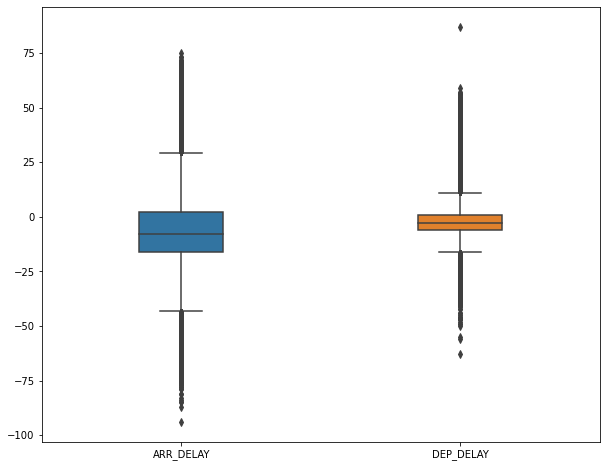

In [599]:
plt.figure(figsize = (10,8))
sns.boxplot(data = Flights[['ARR_DELAY','DEP_DELAY']], width = 0.3)


Drop the arrival delays out of normal range on the boxplots above, because those values will influence our assumptions of decision making.


In [600]:

Flights = Flights[(Flights.ARR_DELAY <= 30) & (Flights.ARR_DELAY >= -50)] #normal arrival delay should be at range[-50, 30]

Flights = Flights[(Flights.DEP_DELAY <= 20) & (Flights.DEP_DELAY >= -20)] #normal departure delay should be at range[-20, 20]


Besides, I assume that if delays happen both at arrival and departure, it'll damage brand name.

In [601]:
# remove delays that happen both at arrival and departure

Flights = Flights[~((Flights.DEP_DELAY > 0) & (Flights.ARR_DELAY > 0))] 

From boxplot below, occupancy rate seems to have no outliers. But in order to choose competitvely profitable airelines, it's necessary to have an occupancy rate above average.

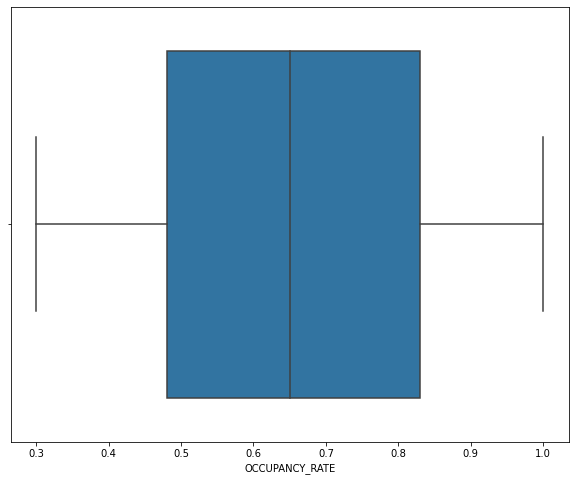

In [602]:
plt.figure(figsize = (10,8))
sns.boxplot(x = Flights.OCCUPANCY_RATE)

Flights = Flights[Flights.OCCUPANCY_RATE > Flights.OCCUPANCY_RATE.mean()] # keep values above average

Detect outliers in 'DISTANCE' using ZSCORE method:

In [603]:
df = Flights.DISTANCE
threshold = 2.5 
mean = np.mean(df)
std = np.std(df)
outlier = []
for i in df.tolist(): 
    zscore = (i-mean)/std 
    if zscore > threshold: 
        outlier.append(i)
            
print('Outlier in "DISTANCE"',outlier)


Outlier in "DISTANCE" [2295, 2329, 2295, 2329, 2295, 2295, 2395, 2295, 2439, 2295, 2425, 2439, 2395, 2408, 2295, 2395, 2409, 2329, 2421, 2409, 2438, 2439, 2421, 2395, 2439, 2408, 2329, 2329, 2295, 2295, 2439, 2395, 2425, 2409, 2329, 2295, 2425, 2421, 2409, 2438, 2565, 2227, 2704, 2419, 2454, 2288, 4962, 4962, 4817, 2306, 2288, 2419, 2358, 2402, 2454, 3904, 3904, 2454, 2218, 2253, 2704, 4243, 3801, 2434, 2434, 2358, 2704, 2306, 2218, 2227, 2565, 2454, 2253, 2704, 2611, 2584, 2446, 2254, 2454, 2227, 2288, 2611, 2565, 2227, 2521, 2565, 2288, 2400, 2393, 2419, 2565, 2227, 2565, 2288, 2253, 2454, 2419, 2419, 2704, 2565, 2611, 2447, 2338, 2504, 3414, 2457, 2556, 2454, 2227, 2565, 2434, 2398, 2565, 2615, 2338, 2556, 2398, 2227, 2504, 2367, 2425, 2358, 2288, 2454, 2565, 2419, 2454, 2704, 2565, 2338, 2447, 3302, 2402, 2338, 2367, 2329, 2400, 2442, 2434, 2454, 2425, 2565, 2442, 2227, 2398, 2486, 2454, 2556, 2454, 2504, 2419, 2425, 2288, 2565, 2521, 2288, 2486, 2454, 2393, 2367, 2585, 2565, 2253,

In [604]:
# remove outliers
Flights = Flights[~Flights.DISTANCE.isin(outlier)]




**1.3 'Tickets' dataset**


In [605]:
Tickets = pd.read_csv("data/Tickets.csv")
Tickets.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


In [606]:
Tickets.tail()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
1167280,201911284909,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,244.0,ANC
1167281,201911284959,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,371.0,JNU
1167282,201911284940,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,271.0,JNU
1167283,201911284914,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,603.0,ANC
1167284,201911284952,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,299.0,JNU


**Remove irrelevant data:**

In [607]:
# only include 2019 Q1 data for analysis
Tickets = Tickets[Tickets.QUARTER.isin([1])]

Tickets = Tickets[Tickets.YEAR.isin([2019])]

# only include US as origin country
Tickets = Tickets[Tickets.ORIGIN_COUNTRY.isin(['US'])]

# only include roundtrips
Tickets = Tickets[Tickets.ROUNDTRIP.isin([1.0])]

**Noticing 'TIN_ID' should be unique for each record:**

In [608]:
# a function to check whether 'TIN_ID' contains duplicates:

def checkIfDuplicates(listofelements):
    ''' Check if given list contains any duplicates '''
    if len(listofelements) == len(set(listofelements)):
        return False
    else:
        print("'TIN_ID' have duplicates.")

checkIfDuplicates(Tickets.ITIN_ID.tolist())


'TIN_ID' have duplicates.


In [609]:
# drop 'TIN_ID' duplicates
Tickets.drop_duplicates(subset = 'ITIN_ID', inplace = True)


**Check datatypes:**

In [610]:
Tickets.dtypes

ITIN_ID                int64
YEAR                   int64
QUARTER                int64
ORIGIN                object
ORIGIN_COUNTRY        object
ORIGIN_STATE_ABR      object
ORIGIN_STATE_NM       object
ROUNDTRIP            float64
REPORTING_CARRIER     object
PASSENGERS           float64
ITIN_FARE             object
DESTINATION           object
dtype: object

**Noticing wrong data types of 'ITIN_FARE':**

In [611]:
# show wrong data types of 'ITIN_FARE'
WRONG_ITIN_FARE = Tickets.loc[Tickets.ITIN_FARE.str.isnumeric()==False]
WRONG_ITIN_FARE.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
10,201912723337,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1647.0,JAX


In [612]:
# call the function again to check whether there is any special symbol
print("'ITIN_FARE' contain special symbols:")
if_contain_symbol(Tickets.ITIN_FARE.to_string())


'ITIN_FARE' contain special symbols:


'$'

Exclude wrong 'ITIN_FARE' values that contain a special symbol:

In [613]:
# find values with '$' symbol
for x in Tickets.ITIN_FARE.astype(str):
    if '$' in x:
        print(x)     
# get '820$$$',  '200 $', and '$ 100.00' as wrong values

# exclude those wrong values
Tickets = Tickets[~Tickets.ITIN_FARE.isin(['200 $', '820$$$', '$ 100.00'])]

820$$$
820$$$
200 $
$ 100.00
200 $
820$$$
820$$$
200 $
200 $
200 $
200 $
$ 100.00
820$$$
$ 100.00
200 $
$ 100.00
200 $
$ 100.00
$ 100.00
$ 100.00
200 $
820$$$
820$$$
$ 100.00
200 $
$ 100.00
200 $
$ 100.00
$ 100.00
$ 100.00
200 $
200 $
200 $
$ 100.00
$ 100.00
200 $
200 $
$ 100.00
200 $
$ 100.00
200 $
200 $
820$$$
200 $
200 $
200 $
$ 100.00
200 $
200 $
$ 100.00
200 $
200 $
$ 100.00
$ 100.00
820$$$
200 $
$ 100.00
$ 100.00
200 $
$ 100.00
820$$$
200 $
200 $
200 $
200 $
200 $
200 $
200 $
820$$$
200 $
200 $
820$$$
200 $
$ 100.00
$ 100.00
$ 100.00
200 $
820$$$
820$$$
$ 100.00
$ 100.00
200 $
200 $
200 $
$ 100.00
820$$$
820$$$
$ 100.00
200 $
820$$$
200 $
820$$$
$ 100.00
200 $
$ 100.00
$ 100.00
200 $
$ 100.00
200 $
200 $
200 $
820$$$
200 $
$ 100.00
200 $
200 $
820$$$
200 $
820$$$
$ 100.00
$ 100.00
200 $
200 $
200 $
200 $
820$$$
$ 100.00
200 $
200 $
200 $
820$$$
200 $
820$$$
200 $
200 $
820$$$
200 $
200 $
$ 100.00
$ 100.00
200 $
200 $
200 $
200 $
200 $
200 $
200 $
200 $
200 $
200 $
200 $
820$$$
20

**Deal with missing values:**


In [614]:
# call the Sparsity_per_variable function again

print('Sparsity per variable:')
print(Sparsity_per_variable(Tickets))

Sparsity per variable:
ITIN_ID              0.000000
YEAR                 0.000000
QUARTER              0.000000
ORIGIN               0.000000
ORIGIN_COUNTRY       0.000000
ORIGIN_STATE_ABR     0.000000
ORIGIN_STATE_NM      0.000000
ROUNDTRIP            0.000000
REPORTING_CARRIER    0.000000
PASSENGERS           0.001452
ITIN_FARE            0.000684
DESTINATION          0.000000
dtype: float64


In [615]:
# fill missing values of 'PASSENGERS' and 'ITIN_FARE' with median 

Tickets.PASSENGERS = Tickets.PASSENGERS.fillna(Tickets.PASSENGERS.median())

Tickets.ITIN_FARE = Tickets.ITIN_FARE.fillna(Tickets.ITIN_FARE.median())

**No missing values for 'Tickets' now.**

In [616]:
print(Sparsity_per_variable(Tickets))

ITIN_ID              0.0
YEAR                 0.0
QUARTER              0.0
ORIGIN               0.0
ORIGIN_COUNTRY       0.0
ORIGIN_STATE_ABR     0.0
ORIGIN_STATE_NM      0.0
ROUNDTRIP            0.0
REPORTING_CARRIER    0.0
PASSENGERS           0.0
ITIN_FARE            0.0
DESTINATION          0.0
dtype: float64


In [617]:
# In previous step of checking data types, I notice that there're many one-digit float numbers of 'ITIN_FARE', which makes them non-numeric.
#Convert those floating numbers to integers:

Tickets.ITIN_FARE = [int(float(x)) for x in Tickets.ITIN_FARE]


**Check datatypes again: Correct int64 type for 'ITIN_FARE'**

In [618]:
Tickets.dtypes

ITIN_ID                int64
YEAR                   int64
QUARTER                int64
ORIGIN                object
ORIGIN_COUNTRY        object
ORIGIN_STATE_ABR      object
ORIGIN_STATE_NM       object
ROUNDTRIP            float64
REPORTING_CARRIER     object
PASSENGERS           float64
ITIN_FARE              int64
DESTINATION           object
dtype: object

**Deal with outliers in 'ITIN_FARE', using ZSCORE method:**


In [619]:
# any value with a zsocre out of threshold 2.5 will be considered as an outlier

df = Tickets.ITIN_FARE
threshold = 2.5 
mean = np.mean(df)
std = np.std(df)
outlier = []
for i in df.tolist(): 
    zscore = (i-mean)/std 
    if zscore > threshold: 
        outlier.append(i)
print('Outlier in "ITIN_FARE"', outlier)


Outlier in "ITIN_FARE" [1647, 1445, 1368, 1497, 1414, 1687, 2081, 1404, 1410, 1728, 1695, 1368, 1539, 1837, 1447, 1350, 2151, 1839, 1705, 1663, 2384, 2490, 1771, 2005, 1431, 1377, 2751, 1411, 2015, 1502, 1435, 1701, 1635, 1890, 4390, 1750, 1817, 2539, 1369, 1724, 1736, 1382, 1534, 1354, 1560, 1427, 1421, 1353, 1898, 1533, 2055, 1624, 1379, 1347, 1697, 1532, 1351, 3947, 1980, 1633, 1471, 1349, 1372, 1876, 1720, 1742, 1818, 2156, 2305, 1384, 1681, 1435, 1637, 1442, 1403, 1472, 1585, 2376, 1841, 1469, 3479, 1468, 1355, 1529, 1596, 2814, 1387, 1890, 1686, 1517, 1709, 1649, 1847, 1699, 2280, 1593, 1475, 1522, 1632, 1392, 2132, 1660, 1662, 1435, 1883, 1386, 1851, 1337, 1750, 1451, 1409, 1467, 1651, 1983, 2052, 2114, 1768, 1734, 1530, 1751, 1346, 1484, 2669, 1493, 1421, 1361, 1447, 2341, 2690, 1560, 1844, 1861, 1485, 4178, 1531, 2284, 1611, 1466, 1875, 1855, 1629, 1722, 1361, 1876, 2405, 1636, 1494, 1425, 1743, 1377, 1429, 1537, 1368, 1363, 1474, 1548, 1932, 1951, 1622, 1600, 1548, 2191, 1967

In [620]:
# remove outliers from 'Tickets' dataset
Tickets = Tickets[~Tickets.ITIN_FARE.isin(outlier)]


Assume ticket fares are not influenced by holidays. Also assume there are first-class, business, and economy tickets, and the first-class tickets value 3 times at most as much as average price. Plus, the average ticket fare is 472.


In order to be profitable than average, I would regard ticket fares more than 1500 but less than average as outliers, combined with information given by the boxplot below.

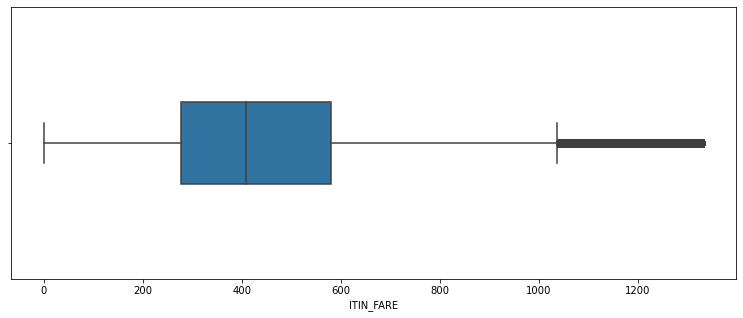

In [621]:
plt.figure(figsize = (13,5))
sns.boxplot(x = Tickets.ITIN_FARE, width = 0.3)

#remove outliers
Tickets = Tickets[(Tickets.ITIN_FARE <= 1500) & (Tickets.ITIN_FARE >= Tickets.ITIN_FARE.mean())]

## 2. Data Munging ##

**2.1  For 'Flights' dataset, group by ['ORIGIN','DESTINATION'], and use mean value of numeric variables for each group.**

**As a result, 'NEW_FLIGHTS' is a new dataset that describes information about each route.**

In [622]:
NEW_FLIGHTS = Flights.groupby(['ORIGIN','DESTINATION'],as_index=False)['DEP_DELAY','ARR_DELAY','MEAN_DELAY','AIR_TIME','DISTANCE','OCCUPANCY_RATE','PASSENGER_NUM'].agg('mean').round(2)

NEW_FLIGHTS.head()


/var/folders/9t/b29bj4zj2ld3w4lv5s2s_v9m0000gn/T/ipykernel_701/484853599.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NEW_FLIGHTS = Flights.groupby(['ORIGIN','DESTINATION'],as_index=False)['DEP_DELAY','ARR_DELAY','MEAN_DELAY','AIR_TIME','DISTANCE','OCCUPANCY_RATE','PASSENGER_NUM'].agg('mean').round(2)


,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,MEAN_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,PASSENGER_NUM
0,ABE,ATL,-3.83,-9.53,-6.68,105.33,692.0,0.82,164.72
1,ABE,CLT,-7.01,-7.67,-7.34,97.75,481.0,0.84,167.80
2,ABE,DTW,-4.32,-8.98,-6.65,84.65,425.0,0.82,164.45
3,ABE,FLL,-4.00,-1.00,-2.50,143.00,1041.0,0.86,172.67
4,ABE,ORD,-7.87,-14.69,-11.28,111.18,654.0,0.82,164.43


**2.2  'Tickets' left join 'NEW_FLIGHTS':**

Here I assume that all the round trip routes in 'Tickets' can be founded in 'NEW_FLIGHTS'.

Another assumption is that for every round trip route in 'Tickets', the 'ORIGIN' in 'Tickets' can be either the 'ORIGIN' or 'DESTINATION' in 'NEW_FLIGHTS', which means every round trip record in 'Tickets' can match two records in 'NEW_FLIGHTS'.

**As a result, get a new dataset 'NEW_TICKETS'.**

In [623]:
# 1st situation when origin and destination in 'Tickets' exactly match those in 'NEW_FLIGHTS'
NEW_TICKETS = Tickets.merge(NEW_FLIGHTS, how = 'left', on = ['ORIGIN','DESTINATION']) 

# 2nd situation when origin and destination in 'Tickets' oppositely match those in 'NEW_FLIGHTS'
NEW_TICKETS.update(Tickets.merge(NEW_FLIGHTS, how = 'left',  left_on = ['ORIGIN','DESTINATION'], right_on = ['DESTINATION', 'ORIGIN']))

NEW_TICKETS.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION,DEP_DELAY,ARR_DELAY,MEAN_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,PASSENGER_NUM
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736,DAB,-3.72,-9.19,-6.46,60.58,366.0,0.84,167.81
1,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736,COS,-3.61,-9.29,-6.45,71.26,416.0,0.82,164.11
2,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736,MCO,0.00,-12.00,-6.00,110.00,891.0,0.79,158.00
3,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570,BNA,-4.64,-11.80,-8.22,137.28,1184.0,0.85,169.68
4,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570,MCO,-5.36,-8.89,-7.13,20.94,73.0,0.82,164.47


**2.3  'NEW_TICKETS' left join 'Air_Codes':**

<span style='color:Blue'>Create two metadata fields in 'Air_Codes': 'TYPE_DES' describes airport types of destinations. 'IATA_DES' describes IATA codes of destinations. Use initial 'TYPE' and 'IATA_CODE' for originations.</span>

In [624]:
Air_Codes['TYPE_DES'] = Air_Codes['TYPE']  
Air_Codes['IATA_DES'] = Air_Codes['IATA_CODE']


In [625]:
# when origins match IATA codes:
ORIGIN_DF = NEW_TICKETS.merge(Air_Codes, how = 'left', left_on = 'ORIGIN', right_on = 'IATA_CODE')

# only keeps airline code information about origins:
ORIGIN_DF = ORIGIN_DF[['TYPE','IATA_CODE']]


In [626]:
# when destinations match IATA codes:
DES_DF = NEW_TICKETS.merge(Air_Codes, how = 'left', left_on = 'DESTINATION', right_on = 'IATA_DES')

# only keeps airline code information about destinations:
DES_DF.drop(['IATA_CODE','TYPE'], axis = 1, inplace = True)


**2.4 Finally, merge all the data together:**

In [627]:
# combine information of origins and destinations together:

DF_FINAL = pd.concat([ORIGIN_DF, DES_DF], axis = 1)


In [628]:
# drop unnecessary columns

DF_FINAL.drop(['YEAR','QUARTER','ORIGIN_COUNTRY','ORIGIN_STATE_ABR','ORIGIN_STATE_NM','ROUNDTRIP','REPORTING_CARRIER','NAME','ISO_COUNTRY','MUNICIPALITY','IATA_CODE','IATA_DES','PASSENGERS','ELEVATION_FT'], axis=1, inplace=True )


In [629]:
# drop nan values

DF_FINAL.dropna(axis = 0, inplace = True)

In [630]:
# convert to integers

DF_FINAL[['ITIN_FARE','DEP_DELAY','ARR_DELAY','MEAN_DELAY','AIR_TIME','DISTANCE','PASSENGER_NUM']] = DF_FINAL[['ITIN_FARE','DEP_DELAY','ARR_DELAY','MEAN_DELAY','AIR_TIME','DISTANCE','PASSENGER_NUM']].astype(int)


In [631]:
# re-arrange the order of columns

DF_FINAL = DF_FINAL[['ITIN_ID','ORIGIN', 'TYPE', 'DESTINATION', 'TYPE_DES','ITIN_FARE', 'DEP_DELAY', 'ARR_DELAY',
       'MEAN_DELAY', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE', 'PASSENGER_NUM','COORDINATES']]


<span style='color:Blue'>Create metadata field called 'ROUND_ROUTE' to indicate the origination and destination of round trips</span>

In [632]:
DF_FINAL.insert(1, 'ROUND_ROUTE', DF_FINAL['ORIGIN'] + ' ' + 'to' + ' ' + DF_FINAL['DESTINATION'])

In [633]:
DF_FINAL.head()

,ITIN_ID,ROUND_ROUTE,ORIGIN,TYPE,DESTINATION,TYPE_DES,ITIN_FARE,DEP_DELAY,ARR_DELAY,MEAN_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,PASSENGER_NUM,COORDINATES
0,2.019127e+11,ABI to DAB,ABI,medium_airport,DAB,large_airport,736,-3,-9,-6,60,366,0.84,167,"-81.058098, 29.179899"
1,2.019127e+11,ABI to COS,ABI,medium_airport,COS,large_airport,736,-3,-9,-6,71,416,0.82,164,"-104.700996, 38.805801"
2,2.019127e+11,ABI to MCO,ABI,medium_airport,MCO,large_airport,736,0,-12,-6,110,891,0.79,158,"-81.30899810791016, 28.429399490356445"
3,2.019127e+11,ABI to BNA,ABI,medium_airport,BNA,large_airport,570,-4,-11,-8,137,1184,0.85,169,"-86.6781997680664, 36.1245002746582"
4,2.019127e+11,ABI to MCO,ABI,medium_airport,MCO,large_airport,570,-5,-8,-7,20,73,0.82,164,"-81.30899810791016, 28.429399490356445"


## 3. Calculations and Visualizations ##

**3.1 Traffic (Top 10 busiest round trip routes):**

<span style='color:Blue'>Create metadata field called 'ROUNDTRIP_NUM', which describes the number of roundtrip flights.</span>

In [634]:
# get the number of roundtrip flights by counting distinct itinerary IDs per round route:

DF_FINAL['ROUNDTRIP_NUM'] = DF_FINAL.groupby(['ROUND_ROUTE'])['ITIN_ID'].transform('count')

In [635]:
# get top 10 busiest round trip routes:

TOP10_BUSIEST = DF_FINAL.sort_values(by = ['ROUNDTRIP_NUM'], ascending = False).drop_duplicates(['ROUNDTRIP_NUM']).reset_index(drop = True).head(10)

TOP10_BUSIEST[['ROUND_ROUTE','ROUNDTRIP_NUM']]


,ROUND_ROUTE,ROUNDTRIP_NUM
0,LAX to ATL,460
1,EWR to ATL,386
2,ORD to ATL,376
3,MSP to ATL,374
4,LAX to HNL,373
5,SFO to ATL,370
6,JFK to LAX,363
7,LGA to ATL,362
8,JFK to SFO,343
9,ORD to SFO,335


<AxesSubplot:title={'center':'Top 10 busiest round route'}, xlabel='ROUND_ROUTE', ylabel='ROUNDTRIP_NUM'>

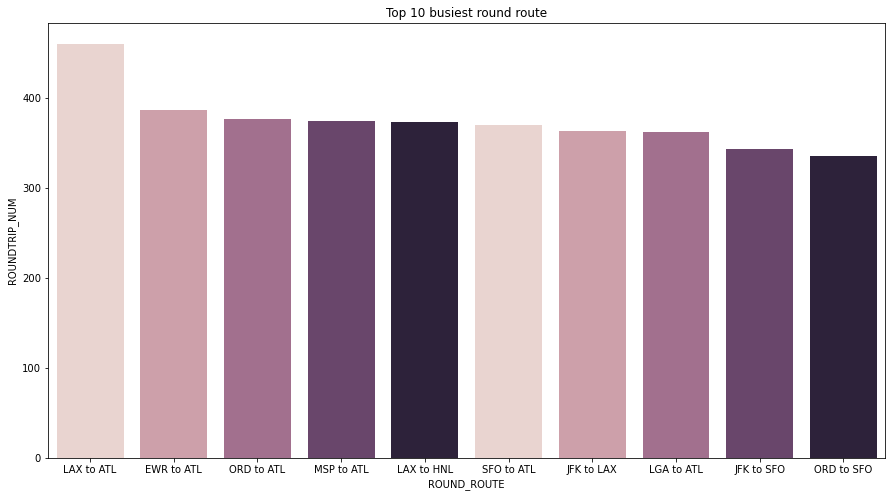

In [636]:
# plot a bar chart to show top 10 busiest round trips:

plt.figure(figsize=(15,8))
plt.xlabel('Round routes')
plt.ylabel('Number of round trip flights')
plt.title('Top 10 busiest round route')

sns.barplot(x = TOP10_BUSIEST['ROUND_ROUTE'], y = TOP10_BUSIEST['ROUNDTRIP_NUM'],  palette = sns.cubehelix_palette(len(x)))


Text(0.5, 1.0, 'Top 10 Busiest Round Route')

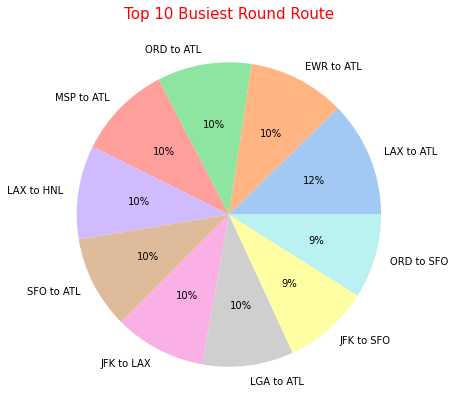

In [637]:
# plot a pie chart to show proportions

plt.figure(figsize = (7,7))
colors = sns.color_palette('pastel')
labels = TOP10_BUSIEST['ROUND_ROUTE']
plt.pie(TOP10_BUSIEST['ROUNDTRIP_NUM'], labels = labels, colors = colors, autopct = '%0.0f%%')

plt.title('Top 10 Busiest Round Route',color = 'red',fontsize = 15)


From the bar chart above, 8 out of 10 round routes take a proportion at least 10% of total traffic.

**3.2 Profitability (Top 10 most profitable round trip routes):**


Calculating total revenues:

In [652]:
# Assume 50% of passengers spend $70 baggage fees for a round trip, and the rest passengers don't need to check baggages.

baggage_fee = 70 * 0.5 * DF_FINAL['PASSENGER_NUM']

# Total ticket fares:

ticket_fares = DF_FINAL['PASSENGER_NUM'] * DF_FINAL['ITIN_FARE']


<span style='color:Blue'>Create metadata field called 'TOTAL_REVENUE', which describes total revenue for a round trip route</span>

In [653]:
DF_FINAL['TOTAL_REVENUE'] = baggage_fee + ticket_fares

DF_FINAL['TOTAL_REVENUE'].update(DF_FINAL.groupby(['ROUND_ROUTE'])['TOTAL_REVENUE'].transform('sum'))


Calculating total costs:

In [654]:
# Fuel, Oil, Maintenance, Crew costs:

cost1 = 8 * DF_FINAL['DISTANCE'] * 2


# Depreciation, Insurance, Other costs:

cost2 = 1.18 * DF_FINAL['DISTANCE'] * 2
    

In [655]:
# Costs for using airports:

conditions = [DF_FINAL['TYPE'].eq('medium_airport') & DF_FINAL['TYPE_DES'].eq('medium_airport'),
              DF_FINAL['TYPE'].eq('large_airport') & DF_FINAL['TYPE_DES'].eq('large_airport'),
              DF_FINAL['TYPE'].eq('medium_airport') & DF_FINAL['TYPE_DES'].eq('large_airport'),
              DF_FINAL['TYPE'].eq('large_airport') & DF_FINAL['TYPE_DES'].eq('medium_airport')]
              
choices = [10000, 20000, 15000, 15000]

cost3 = np.select(conditions, choices, default=0)


In [656]:
# Costs for delays:

conditions = [(DF_FINAL['DEP_DELAY'] > 15) & (DF_FINAL['ARR_DELAY'] > 15),
              (DF_FINAL['DEP_DELAY'] > 15) & (DF_FINAL['ARR_DELAY'] < 15),
              (DF_FINAL['DEP_DELAY'] < 15) & (DF_FINAL['ARR_DELAY'] > 15)]
    
choices = [75 * (DF_FINAL['ARR_DELAY'] + DF_FINAL['DEP_DELAY'] - 30),
           75 * (DF_FINAL['DEP_DELAY'] - 15),
           75 * (DF_FINAL['ARR_DELAY'] - 15)]
    
cost4 = np.select(conditions, choices, default=0)


<span style='color:Blue'>Create metadata field 'TOTAL_COSTS', which describes total costs for each round trip route</span>

In [657]:
DF_FINAL['TOTAL_COSTS'] = cost1 + cost2 + cost3 + cost4

DF_FINAL['TOTAL_COSTS'].update(DF_FINAL.groupby(['ROUND_ROUTE'])['TOTAL_COSTS'].transform('sum'))


Calculating total profits:

<span style='color:Blue'>Create metadata field 'PROFITS', which describes profits for a round trip route.</span>

<span style='color:Blue'>  Create metadata field 'PROFIT_MARGIN', which describes the net profit margin for a round trip route.</span>

In [658]:
DF_FINAL['PROFITS'] = DF_FINAL['TOTAL_REVENUE'] - DF_FINAL['TOTAL_COSTS']


In [659]:
# get top 10 most profitable round trip routes:

TOP10_PROFITABLE = DF_FINAL.sort_values(by = ['PROFITS'], ascending = False).drop_duplicates(['PROFITS']).reset_index(drop = True).head(10)

TOP10_PROFITABLE['PROFIT_MARGIN'] = TOP10_PROFITABLE['PROFITS'] / TOP10_PROFITABLE['TOTAL_REVENUE']

# show important summary values：
TOP10_PROFITABLE.drop( ['ITIN_ID','COORDINATES','DEP_DELAY','ARR_DELAY','DISTANCE','AIR_TIME','ITIN_FARE','OCCUPANCY_RATE','PASSENGER_NUM'], axis = 1, inplace = False)



,ROUND_ROUTE,ORIGIN,TYPE,DESTINATION,TYPE_DES,MEAN_DELAY,ROUNDTRIP_NUM,TOTAL_REVENUE,TOTAL_COSTS,PROFITS,PROFIT_MARGIN
0,LAX to ATL,LAX,large_airport,ATL,large_airport,-8,460,54976600.0,16034199.36,38942400.64,0.708345
1,EWR to ATL,EWR,medium_airport,ATL,large_airport,-2,386,49589652.0,13389328.88,36200323.12,0.729998
2,ORD to ATL,ORD,large_airport,ATL,large_airport,-11,376,46280898.0,12868928.96,33411969.04,0.721939
3,LAX to HNL,LAX,large_airport,HNL,large_airport,-6,373,45366388.0,13633281.88,31733106.12,0.699485
4,MSP to ATL,MSP,large_airport,ATL,large_airport,-8,374,43860398.0,13228223.44,30632174.56,0.698402
5,BOS to SFO,BOS,large_airport,SFO,large_airport,-11,333,41579555.0,11703689.20,29875865.80,0.718523
6,ORD to SFO,ORD,large_airport,SFO,large_airport,-5,335,39919363.0,11927344.72,27992018.28,0.701214
7,SFO to ATL,SFO,large_airport,ATL,large_airport,-6,370,41300624.0,13316112.32,27984511.68,0.677581
8,EWR to SFO,EWR,large_airport,SFO,large_airport,-9,297,37149746.0,10432726.00,26717020.00,0.719171
9,LGA to ATL,LGA,large_airport,ATL,large_airport,-7,362,39529698.0,13006508.80,26523189.20,0.670969


Text(0.5, 1.0, 'Top 10 most profitable round routes')

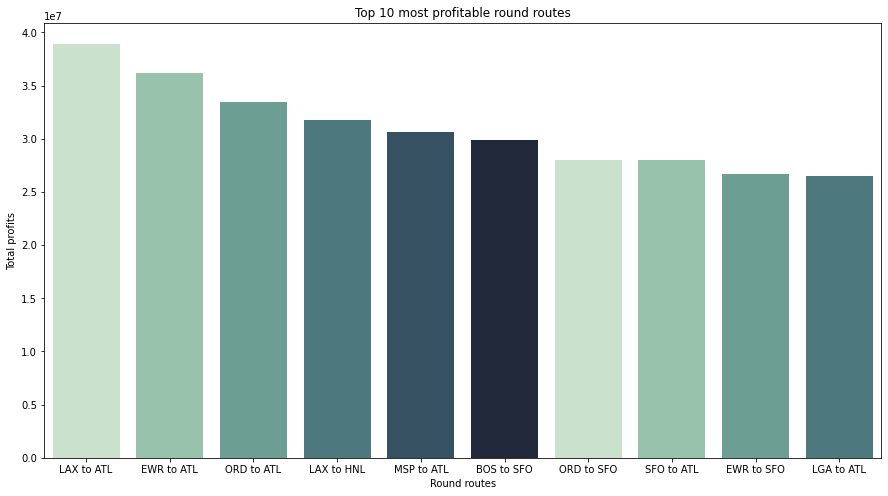

In [660]:
# plot a bar chart to show top 10 most profitable round routes:

plt.figure(figsize=(15,8))

sns.barplot(x = TOP10_PROFITABLE['ROUND_ROUTE'], y = TOP10_PROFITABLE['PROFITS'],  palette = sns.cubehelix_palette(rot=-.4))

plt.xlabel('Round routes')
plt.ylabel('Total profits')
plt.title('Top 10 most profitable round routes')


Text(0.5, 1.0, 'Top 10 Most Profitable Round Route')

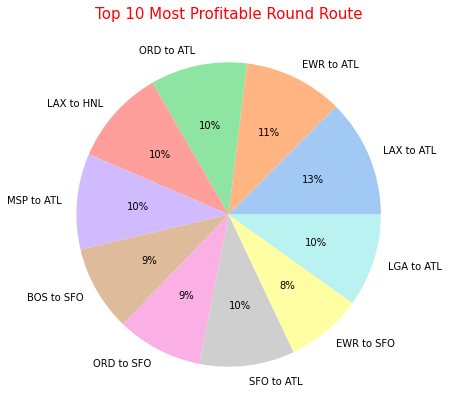

In [661]:
# plot a pie chart to show proportions

plt.figure(figsize = (7,7))
colors = sns.color_palette('pastel')
labels = TOP10_PROFITABLE['ROUND_ROUTE']
plt.pie(TOP10_PROFITABLE['ROUNDTRIP_NUM'], labels = labels, colors = colors, autopct = '%0.0f%%')

plt.title('Top 10 Most Profitable Round Route',color = 'red',fontsize = 15)

## 4. Recommendations ##

**First proprity** : My principle of recommendations is to put Profit at the first, because it also reflects Traffic to some extent.

According to the pie chart "Top 10 Most Profitable Round Route", I set a threshold of 10% as a indicator of beyond-average profit contribution. Moreover, assume we hope to keep a net profit margin ratio at least 72% after 2019Q1.

Based on these two thresholds on profitablity, the picked round trip routes will have strong ability of generating profits and constantly growing in the future. 2 round routes are picked: EWR to ATL (with 11% profit contribution and about 73% net profit margin rate), and ORD to ATL (with 10% profit contribution and about 72% net profit margin rate).



**Second priority** : Traffic, which can be a multiplier of profits if delays are controlled in an acceptable range.
Set a threshold of 10% as a indicator of beyond-average traffic contribution. Use 10% as threshold, we can see 8 out 10 routes contribute beyond average, which are : LAX to ATL, EWR to ATL, ORD to ATL, MSP to ATL, LAX to HNL, SFO to ATL, JFK to LAX, and LGA to ATL. Combined with previous step, 8 round trip routes are picked at this stage : LAX to ATL, EWR to ATL, ORD to ATL, MSP to ATL, LAX to HNL, SFO to ATL, JFK to LAX, and LGA to ATL.


**The last important factor** : Punctuality. With a motto of “On time, for you”, our airline company regards punctuality as an important intangible asset that can add value to our brand name, driving profits indirectly.

I assume that the importance of punctuality should be the same at both arrival and departure. The column 'MEAN_DELAY' calculates the average (50/50) delay time. In the analysis below, I created an 'Punctuality Index', which was expressed as the proportion of punctuality per round trip flight. My purpose is to find the most punctuable 5 routes out of those 8 routes.


<span style='color:Blue'>Create 'Punctuality_Index', which decribes proportion of punctuality per round trip flight.</span>

In [662]:
# create a temporary dataset for those 8 routes
df_temp = DF_FINAL.loc[DF_FINAL.ROUND_ROUTE.isin(['EWR to ATL','LAX to ATL','ORD to ATL','MSP to ATL','LAX to HNL','SFO to ATL','JFK to LAX','LGA to ATL'])]

df_temp.update(df_temp.groupby(['ROUND_ROUTE'])['MEAN_DELAY'].transform('mean')) 

# show punctuality index for 8 routes
df_temp['PUNCTUALITY_INDEX'] = 1 - (df_temp['MEAN_DELAY'] / df_temp['ROUNDTRIP_NUM']) 

df_temp = df_temp.sort_values(by = ['PUNCTUALITY_INDEX'], ascending = False).drop_duplicates(['PUNCTUALITY_INDEX']).reset_index(drop = True)

df_temp

/var/folders/9t/b29bj4zj2ld3w4lv5s2s_v9m0000gn/T/ipykernel_701/3953602956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.update(df_temp.groupby(['ROUND_ROUTE'])['MEAN_DELAY'].transform('mean'))
/var/folders/9t/b29bj4zj2ld3w4lv5s2s_v9m0000gn/T/ipykernel_701/3953602956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['PUNCTUALITY_INDEX'] = 1 - (df_temp['MEAN_DELAY'] / df_temp['ROUNDTRIP_NUM'])


,ITIN_ID,ROUND_ROUTE,ORIGIN,TYPE,DESTINATION,TYPE_DES,ITIN_FARE,DEP_DELAY,ARR_DELAY,MEAN_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,PASSENGER_NUM,COORDINATES,ROUNDTRIP_NUM,TOTAL_REVENUE,TOTAL_COSTS,PROFITS,PUNCTUALITY_INDEX
0,2.019128e+09,SFO to ATL,SFO,large_airport,ATL,large_airport,735,-2,-11,-6.556757,150,986,0.83,166,"-84.375, 33.137551",370,41300624.0,13316112.32,27984511.68,1.017721
1,2.019131e+11,LAX to HNL,LAX,large_airport,HNL,large_airport,1052,-3,-6,-6.560322,63,350,0.83,166,"-157.924228, 21.32062",373,45366388.0,13633281.88,31733106.12,1.017588
2,2.019130e+11,JFK to LAX,JFK,medium_airport,LAX,large_airport,646,-3,-7,-6.344353,34,185,0.83,166,"-118.4079971, 33.94250107",363,36876897.0,12604671.48,24272225.52,1.017478
3,2.019131e+11,MSP to ATL,MSP,large_airport,ATL,large_airport,608,-5,-7,-6.427807,93,752,0.82,164,"-84.428101, 33.6367",374,43860398.0,13228223.44,30632174.56,1.017187
4,2.019131e+11,LGA to ATL,LGA,large_airport,ATL,large_airport,563,-6,-11,-6.198895,135,1025,0.84,168,"-84.375, 33.137551",362,39529698.0,13006508.80,26523189.20,1.017124
5,2.019131e+11,ORD to ATL,ORD,large_airport,ATL,large_airport,1136,0,-6,-6.393617,58,409,0.83,165,"-84.428101, 33.6367",376,46280898.0,12868928.96,33411969.04,1.017004
6,2.019131e+11,EWR to ATL,EWR,medium_airport,ATL,large_airport,1123,-4,-14,-6.388601,135,951,0.84,167,"-84.375, 33.137551",386,49589652.0,13389328.88,36200323.12,1.016551
7,2.019111e+11,LAX to ATL,LAX,large_airport,ATL,large_airport,738,-2,-7,-6.847826,123,1017,0.83,165,"-84.375, 33.137551",460,54976600.0,16034199.36,38942400.64,1.014887


When PUNCTUALITY_INDEX > 1, it indicates that average delay time is negative (arrive or depart earlier than expected).
Table above shows good punctuality for all of those routes.

**Final 5 recommendated routes must be in the first 5 places of Punctuality indexes.**

### Final 5 recommendations:  SFO to ATL, LAX to HNL, JFK to LAX , MSP to ATL, and LGA to ATL round trip routes. 
For JFK to LAX round route, the origin is medium airport and the destination is large airport.
For other routes, origins and destinations are both large airports.

**Breakeven number of flights:**

<span style='color:Blue'>Create a new metadata field 'BREAK_EVEN_NUM' to describe the number of flights it takes to break even the 90 million cost.</span>

In [663]:
Final_recommendation = df_temp.head(5)

Final_recommendation['BREAK_EVEN_NUM'] = (90000000 / (Final_recommendation['PROFITS'] / Final_recommendation['ROUNDTRIP_NUM'])).astype(int)
                                                                                                            

/var/folders/9t/b29bj4zj2ld3w4lv5s2s_v9m0000gn/T/ipykernel_701/1629405472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_recommendation['BREAK_EVEN_NUM'] = (90000000 / (Final_recommendation['PROFITS'] / Final_recommendation['ROUNDTRIP_NUM'])).astype(int)


In [664]:
# show break even flight numbers and necessary information

Final_recommendation[['ROUND_ROUTE','TYPE','TYPE_DES','ROUNDTRIP_NUM','TOTAL_REVENUE','TOTAL_COSTS','PROFITS','PUNCTUALITY_INDEX','BREAK_EVEN_NUM'
                     ]]

,ROUND_ROUTE,TYPE,TYPE_DES,ROUNDTRIP_NUM,TOTAL_REVENUE,TOTAL_COSTS,PROFITS,PUNCTUALITY_INDEX,BREAK_EVEN_NUM
0,SFO to ATL,large_airport,large_airport,370,41300624.0,13316112.32,27984511.68,1.017721,1189
1,LAX to HNL,large_airport,large_airport,373,45366388.0,13633281.88,31733106.12,1.017588,1057
2,JFK to LAX,medium_airport,large_airport,363,36876897.0,12604671.48,24272225.52,1.017478,1345
3,MSP to ATL,large_airport,large_airport,374,43860398.0,13228223.44,30632174.56,1.017187,1098
4,LGA to ATL,large_airport,large_airport,362,39529698.0,13006508.80,26523189.20,1.017124,1228


## 5. KPIs to track

**To track profitability**:

we need to see whether our assumption is working: From 2019Q2, see whether the Net Profit Margin of those recommended routes tend to grow above the 72% benchmark.
Besides, track revenues per passenger per mile, which reflects the revenue per passenger out of cost per mile, indicating the ability to generate revenues from distance-related costs.

**To track traffic:**

we need to track the Occupancy Rate of flights over time for each operating commercial carrier of those 5 round trip routes because it indicates the popularity of originations or destinations, and the quality of customer appealings such as marketing campaigns and service satisfaction. 
It's also an important factor of revenue.

Also look at Absence Rate (proportion of passengers didn't show up) and do research about their reasons. Improve services or systems to reduce Absence Rate. 

**To track punctuality:**

Continue to track Punctuality Index of those round trip routes based on time or geographical areas (IATA codes or Coordinates). Based on different segements, discover the trend and design strategies to improve punctuality.

## 6. Next Steps

After analyzing those numercial factors above, we should look into the question : "Who are out customers?"

**6.1 Customer groups**

We could do a clustering analysis for customer segmentation in order to know more about their consumption behavior. For different customer groups, launch customized marketing campaigns, take the most cost-effective marketing channels or lead sources. After designing specialized strategies or implementing systems, we can run A/B Testing to track the results further.

**6.2 Risks**

On the other hand, we should investigate risks associated with this acquisition of new airlines.

For example, will those new aqucisitions cause intense competition with the existing airlines of our company? Is there any problem due to change of management and culture? Are there other unexpected costs when we're doing due diliegence? Is there any legal risk due to different airline policies and regulations in different areas?